In [1]:
#!/usr/bin/env python
# coding=utf-8

import pandas as pa 
import numpy as np

import json
import os
import networkx as nx
import pygraphviz as gz
from networkx.drawing.nx_pydot import write_dot
import math


from scipy.stats import norm, normaltest, mannwhitneyu, ranksums

import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

import itertools

import csv
from sqlalchemy import exists, func

from database import *

from matplotlib import pylab, pyplot
from matplotlib import dates

import seaborn as sns
sns.set(color_codes=True)

from scipy import stats, integrate

from datetime import datetime, timedelta, date

date_format = '%Y-%m-%dT%H:%M:%S.%fZ'
date_format2 = '%Y-%m-%d %H:%M:%S'

plt.style.use(['seaborn-paper'])
sns.set_style("whitegrid")
#plt.rc('font', family='serif', serif='Charter')
plt.rc('font', family='serif', serif='DejaVu Serif')

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 13

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

x_width  = 6.8898
x_height = x_width / 1.618

s_width  = 3.4449
s_height = s_width / 1.618

def save_plot(name, fig, width, height):
    #fig.tight_layout()
    fig.set_size_inches(width, height)
    #f.subplots_adjust(top=0.86)

    fig.savefig(CDIR+'/'+name, bbox_inches="tight")
    #plt.savefig(CDIR+'/video_view_percentages.pdf', bbox_inches="tight")

In [2]:
DIR = '../../data/data_evaluation_2'
CDIR = '../../data/data_evaluation_2/charts'

db = YTDatabase()

/home/mlode/intel/intelpython27/lib/python2.7/site-packages/sqlalchemy/engine/default.py:470: Warning: Can't create database 'mlode'; database exists
  cursor.execute(statement, parameters)


In [3]:
# get video infos

with db._session_scope(False) as session:

    df_videos = pa.read_sql(session.query(Video).statement, db.engine)

In [4]:
df_videos['dateAdded'] = df_videos['dateAdded'].apply(lambda x: datetime.strptime(x, date_format))
df_videos['crawlTimestamp'] = df_videos['crawlTimestamp'].apply(lambda x: datetime.strptime(x, date_format2))

df_videos.head()

,id,channelID,title,description,category,dateAdded,tags,topicIds,attribution,duration,crawlTimestamp,deleted
0,__3DpIJilQI,UCeE3lj6pLX_gCd0Yvns517Q,Ozzy Man Reviews: Cricket Nut Shots,Me commentary on some of the most eye watering...,24,2017-01-10 07:00:30,"[""ozzy man reviews"",""ozzy"",""man"",""ozzie"",""ozzy...",[],None,PT1M54S,2017-01-11 00:09:08,True
1,__3e1lrV5c8,UCajyfb5EUPd3f3deUk0dBEQ,NEUE DM ZAHNBÜRSTEN PINSEL im LIVE TEST | Mami...,Neu bei dm gibt es die gehypten Zahnbürsten Pi...,26,2017-02-19 11:30:00,"[""mamiseelen"",""dm zahnb\u00fcrsten pinsel"",""li...","[""/m/0yxzwny"",""/m/012xff""]",None,PT7M41S,2017-02-20 00:10:55,None
2,__9SOMd43ZU,UCd1i_q0hjylUeGZ-KNCVKHw,Meine Top 15 Lieblingscharaktere bei Warrior Cats,Ich hatte einfach Lust darauf :D,1,2017-01-27 20:02:22,"[""warrior cats"",""warriors"",""video"",""top 15"",""l...",[],None,PT5M20S,2017-01-28 00:09:57,None
3,__9yzCbryRw,UCBkZWl8s1Cg22Yw11O6A-PQ,A Futile Effort!/Hope Incarnate! | Made By Son...,READ THIS :D\nI really Love this Song a lot. I...,23,2017-02-12 19:32:47,"[""Hip Hop"",""Sonic The Ghetto-Hog productions"",...","[""/m/08b26_""]",None,PT4M10S,2017-02-13 00:10:02,None
4,__a2l0NAz_s,UC4mIXJ9mvfhchQd3uD7GeMw,Minecraft Mineplex Live Stream! W/TheFlubKing,FLUBKING! https://www.youtube.com/watch?v=ULNC...,20,2017-02-05 22:23:25,[],"[""/m/0zrtxq1"",""/m/09v6kpg""]",None,PT1H10M2S,2017-02-06 00:08:44,None


In [5]:
# duration calculation
import isodate

durations = []
for dt in df_videos['duration']:
    dur = isodate.parse_duration(dt)
    durations.append(dur.total_seconds())

df_duration = pa.DataFrame(durations)
print 'Sum:', df_duration.sum(),'seconds'
print 'Sum:', df_duration.sum()/3600,'std'
print df_duration.describe()


Sum: 0    135061167.0
dtype: float64 seconds
Sum: 0    37516.990833
dtype: float64 std
                   0
count  122447.000000
mean     1103.017363
std      2147.398701
min         1.000000
25%       276.000000
50%       583.000000
75%      1011.000000
max     86459.000000


<IPython.core.display.Javascript object>


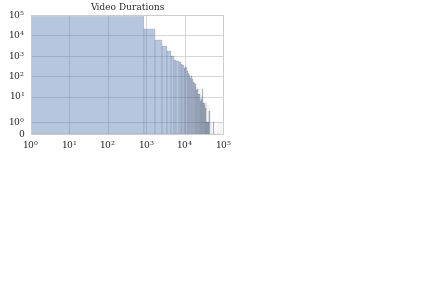

<IPython.core.display.Javascript object>


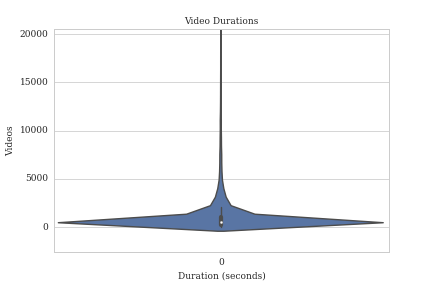

/home/mlode/intel/intelpython27/lib/python2.7/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


In [7]:
fig = plt.figure()
ax = sns.distplot(df_duration, kde=False, bins=100)
ax.set_xlabel('Duration (seconds)')
ax.set_ylabel('Videos')
ax.set_xscale('log')
ax.set_yscale('symlog')
#ax.legend()
plt.title('Video Durations')

save_plot('video_durations.pdf', fig, s_width, s_height)

fig = plt.figure()
ax = sns.violinplot(df_duration)
ax.set_xlabel('Duration (seconds)')
ax.set_ylabel('Videos')
#ax.set_xscale('log')
#ax.set_yscale('symlog')
#ax.legend()
plt.title('Video Durations')

<IPython.core.display.Javascript object>


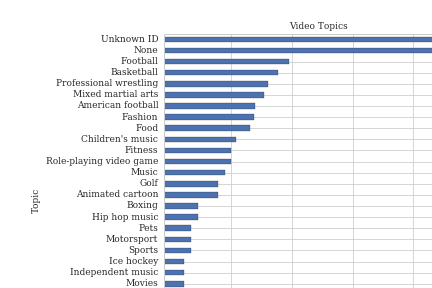

In [8]:
# Video topics distribution
topics = [x for x in csv.reader(open('../../data/'+'topics.txt','r'), delimiter='\t')]


topicIDs = []
topicTitles = {}
for t, tt in topics:
    topicIDs.append(t)
    topicTitles[t]=tt
            
topicIDs.append('/m/None')    
topicTitles['/m/None'] = 'None'

topicIDs.append('/m/NaT')    
topicTitles['/m/NaT'] = 'Unknown ID'

topiclist = []
for ct in df_videos['topicIds']:
    if len(json.loads(ct))==0:
        topiclist.append('/m/None')
    for t in json.loads(ct):
        if t in topicIDs: # Filter not supported topics (as of 2017, Freebase deprecated)
            topiclist.append(t)
        else:
            topiclist.append('/m/NaT')

df_topics = pa.DataFrame({ 'Topic' : [topicTitles[t] for t in topiclist]})

fig = plt.figure()
ax = df_topics['Topic'].value_counts().sort_values(ascending=True).plot(kind='barh')
ax.set_xlabel('Videos')
ax.set_ylabel('Topic')
ax.set_xscale('symlog', linthreshx=10)
#ax.set_yscale('log')
#ax.legend()
plt.title('Video Topics')
fig.tight_layout()
save_plot('video_topics.pdf', fig, x_width, 1.4*x_height)

In [9]:
print len(df_videos)

print len(df_topics[df_topics.Topic!='None'])
df_topics['Topic'].value_counts()

122447
79006


Unknown ID                 78618
None                       64036
Football                      88
Basketball                    58
Professional wrestling        41
Mixed martial arts            35
American football             25
Fashion                       24
Food                          20
Children's music              12
Fitness                       10
Role-playing video game       10
Music                          9
Golf                           8
Animated cartoon               8
Boxing                         5
Hip hop music                  5
Pets                           4
Motorsport                     4
Sports                         4
Ice hockey                     3
Independent music              3
Movies                         3
Racing video game              2
Vehicles                       2
Entertainment                  1
Tennis                         1
Music of Latin America         1
Cricket                        1
Strategy video game            1
Name: Topi

<IPython.core.display.Javascript object>


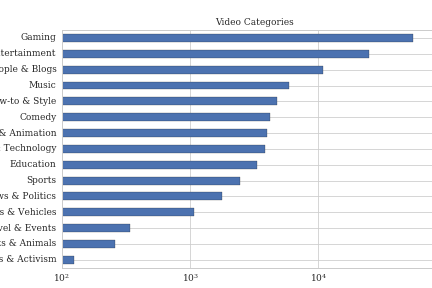

122447


Gaming                    54423
Entertainment             25027
People & Blogs            10938
Music                      5871
How-to & Style             4764
Comedy                     4227
Film & Animation           3974
Science & Technology       3869
Education                  3339
Sports                     2444
News & Politics            1774
Cars & Vehicles            1069
Travel & Events             341
Pets & Animals              261
Non-profits & Activism      123
Name: Category, dtype: int64

In [10]:
#categorys
categories = [x for x in csv.reader(open('../../data/'+'categories.txt','r'), delimiter='\t')]

catIDs = []
catTitles = {}
for t, tt in categories:
    #print t, tt
    catIDs.append(int(t))
    catTitles[int(t)]=tt
    
categorylist = []
for vt in df_videos['category']:
    if int(vt) in catIDs: # Filter not supported
        categorylist.append(int(vt))
        
df_cats = pa.DataFrame({ 'Category' : [catTitles[t] for t in categorylist]})
fig = plt.figure()
ax = df_cats['Category'].value_counts().sort_values(ascending=True).plot(kind='barh')
ax.set_xlabel('Videos')
ax.set_ylabel('Category')
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.legend()
plt.title('Video Categories')
#fig.tight_layout()
save_plot('video_Categories.pdf', fig, x_width, x_height)

print len(df_videos)

df_cats['Category'].value_counts()

In [11]:
channel_groups = df_videos.groupby(by='channelID')

In [12]:
counts = channel_groups['id'].count().sort_values(ascending=False)
print len(channel_groups)
counts.head()
counts.describe()

5466


count    5466.000000
mean       22.401573
std        33.851464
min         1.000000
25%         4.000000
50%        11.000000
75%        26.000000
max       484.000000
Name: id, dtype: float64

In [13]:
df_videos['day_added'] = df_videos['dateAdded'].apply(lambda x: x.weekday())
df_videos['time_added'] = df_videos['dateAdded'].apply(lambda x: x.time())
df_videos['min_added'] = df_videos['dateAdded'].apply(lambda x: x.minute)
df_videos['hr_added'] = df_videos['dateAdded'].apply(lambda x: int(x.strftime('%H')))
df_videos['dayn'] = df_videos['dateAdded'].apply(lambda x: x.strftime("%A"))
df_videos.head()


,id,channelID,title,description,category,dateAdded,tags,topicIds,attribution,duration,crawlTimestamp,deleted,day_added,time_added,min_added,hr_added,dayn
0,__3DpIJilQI,UCeE3lj6pLX_gCd0Yvns517Q,Ozzy Man Reviews: Cricket Nut Shots,Me commentary on some of the most eye watering...,24,2017-01-10 07:00:30,"[""ozzy man reviews"",""ozzy"",""man"",""ozzie"",""ozzy...",[],None,PT1M54S,2017-01-11 00:09:08,True,1,07:00:30,0,7,Tuesday
1,__3e1lrV5c8,UCajyfb5EUPd3f3deUk0dBEQ,NEUE DM ZAHNBÜRSTEN PINSEL im LIVE TEST | Mami...,Neu bei dm gibt es die gehypten Zahnbürsten Pi...,26,2017-02-19 11:30:00,"[""mamiseelen"",""dm zahnb\u00fcrsten pinsel"",""li...","[""/m/0yxzwny"",""/m/012xff""]",None,PT7M41S,2017-02-20 00:10:55,None,6,11:30:00,30,11,Sunday
2,__9SOMd43ZU,UCd1i_q0hjylUeGZ-KNCVKHw,Meine Top 15 Lieblingscharaktere bei Warrior Cats,Ich hatte einfach Lust darauf :D,1,2017-01-27 20:02:22,"[""warrior cats"",""warriors"",""video"",""top 15"",""l...",[],None,PT5M20S,2017-01-28 00:09:57,None,4,20:02:22,2,20,Friday
3,__9yzCbryRw,UCBkZWl8s1Cg22Yw11O6A-PQ,A Futile Effort!/Hope Incarnate! | Made By Son...,READ THIS :D\nI really Love this Song a lot. I...,23,2017-02-12 19:32:47,"[""Hip Hop"",""Sonic The Ghetto-Hog productions"",...","[""/m/08b26_""]",None,PT4M10S,2017-02-13 00:10:02,None,6,19:32:47,32,19,Sunday
4,__a2l0NAz_s,UC4mIXJ9mvfhchQd3uD7GeMw,Minecraft Mineplex Live Stream! W/TheFlubKing,FLUBKING! https://www.youtube.com/watch?v=ULNC...,20,2017-02-05 22:23:25,[],"[""/m/0zrtxq1"",""/m/09v6kpg""]",None,PT1H10M2S,2017-02-06 00:08:44,None,6,22:23:25,23,22,Sunday


Int64Index([4, 3, 2, 0, 5, 1, 6], dtype='int64')


<IPython.core.display.Javascript object>


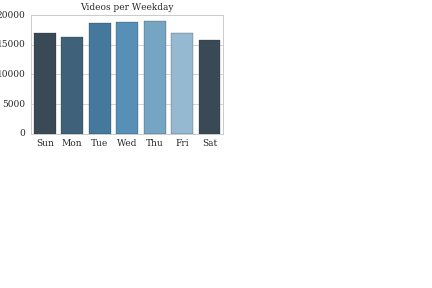

[u'0', u'1', u'2', u'3', u'4', u'5', u'6']


In [14]:
weekdays_dic ={-1.0:'',0.0:'Sun', 1.0:'Mon', 2.0:'Tue',3.0:'Wed',4.0:'Thu',5.0:'Fri',6.0:'Sat',7.0:''}

counts = df_videos['day_added'].value_counts()
print counts.index

fig = plt.figure()

#df_counts = pa.DataFrame(counts, index=[range(len(counts))])
ax = sns.barplot(x=counts.index, y=counts.values, palette=sns.color_palette("Blues_d"))
ax.set_xlabel('Weekday')
ax.set_ylabel('Videos')
ax.set_title('Videos per Weekday')

ax.set_xticklabels(ax.get_xticks())
labels = [item.get_text() for item in ax.get_xticklabels()]
print labels
ax.set_xticklabels([weekdays_dic[float(i)] for i in labels])

save_plot('video_uploads_weekdays.pdf', fig, s_width, s_height)

<IPython.core.display.Javascript object>


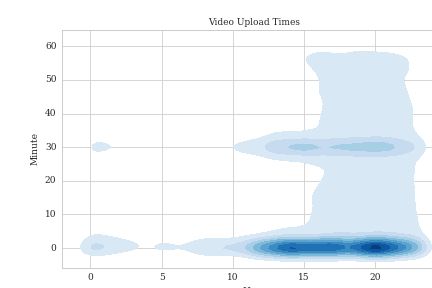

<IPython.core.display.Javascript object>


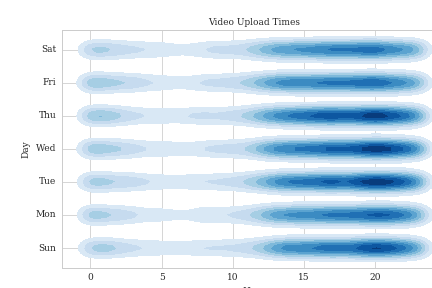

[u'-1.0', u'0.0', u'1.0', u'2.0', u'3.0', u'4.0', u'5.0', u'6.0', u'7.0']


In [16]:
#  plotting upload minutes to hours and day to hour


# scatter plot the points to see the dist? heatplot?
#g = sns.lmplot(x="hr_added", y="min_added", hue='day_added', data=group, fit_reg=False)
from scipy.stats import gaussian_kde

# Calculate the point density
x = df_videos['hr_added']
y = df_videos['min_added']
z = df_videos['day_added']

# Set up the figure
f, ax = plt.subplots()
ax.set_aspect("auto")

# Draw the two density plots
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Minute')
plt.title('Video Upload Times')
save_plot('video_uploads_time_map.pdf', f, x_width, x_height)

weekdays_dic ={-1.0:'',0.0:'Sun', 1.0:'Mon', 2.0:'Tue',3.0:'Wed',4.0:'Thu',5.0:'Fri',6.0:'Sat',7.0:''}

# Set up the figure
f, ax = plt.subplots()
ax.set_aspect("auto")

# Draw the two density plots
ax = sns.kdeplot(x, z, cmap="Blues", shade=True, shade_lowest=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Day')
ax.set_yticklabels(ax.get_yticks())
labels = [item.get_text() for item in ax.get_yticklabels()]
print labels
ax.set_yticklabels([weekdays_dic[float(i)] for i in labels])
plt.title('Video Upload Times')
save_plot('video_uploads_day_map.pdf', f, x_width, x_height)

<IPython.core.display.Javascript object>


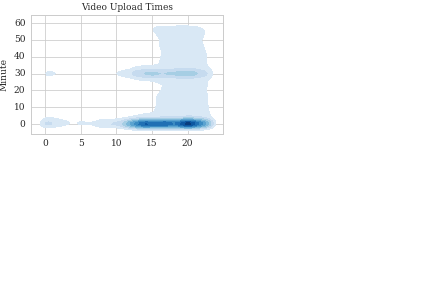

<IPython.core.display.Javascript object>


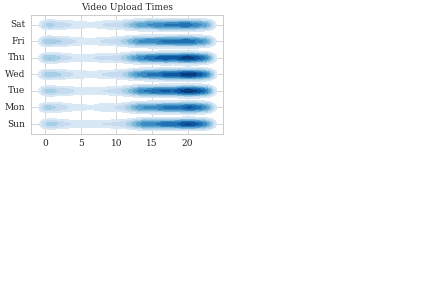

[u'-1.0', u'0.0', u'1.0', u'2.0', u'3.0', u'4.0', u'5.0', u'6.0', u'7.0']


In [17]:
# same but small


# scatter plot the points to see the dist? heatplot?
#g = sns.lmplot(x="hr_added", y="min_added", hue='day_added', data=group, fit_reg=False)
from scipy.stats import gaussian_kde

# Calculate the point density
x = df_videos['hr_added']
y = df_videos['min_added']
z = df_videos['day_added']

# Set up the figure
f, ax = plt.subplots()
ax.set_aspect("auto")

# Draw the two density plots
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Minute')
plt.title('Video Upload Times')
save_plot('video_uploads_time_map_small.pdf', f, s_width, s_height)

weekdays_dic ={-1.0:'',0.0:'Sun', 1.0:'Mon', 2.0:'Tue',3.0:'Wed',4.0:'Thu',5.0:'Fri',6.0:'Sat',7.0:''}

# Set up the figure
f, ax = plt.subplots()
ax.set_aspect("auto")

# Draw the two density plots
ax = sns.kdeplot(x, z, cmap="Blues", shade=True, shade_lowest=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Day')
ax.set_yticklabels(ax.get_yticks())
labels = [item.get_text() for item in ax.get_yticklabels()]
print labels
ax.set_yticklabels([weekdays_dic[float(i)] for i in labels])
plt.title('Video Upload Times')
save_plot('video_uploads_day_map_small.pdf', f, s_width, s_height)

<IPython.core.display.Javascript object>


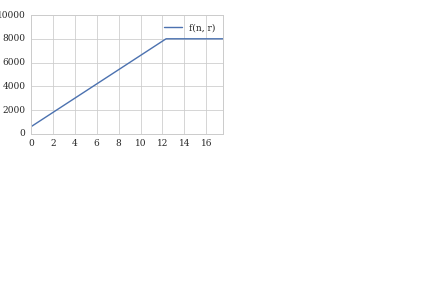

[(0, 600),
 (60, 610),
 (600, 700),
 (1800, 900),
 (3600, 1200),
 (7200, 1800),
 (43200, 7800),
 (86400, 8000)]

In [18]:
# frame extraction rate plot

min_frames = 600
max_frames = 8000

def index_spread(frames, duration):
    #print flength, stime
    num_frames = int(((1.0/6.0)* duration) + min_frames)
    if num_frames >= max_frames:
        num_frames = max_frames
    return (duration, num_frames)

#slength = int(frame_num / frame_rate)
#metricFn(frame_num, slength)

l = [index_spread(i, int(i/24)) for i in range(0, 63200*24, 100)]



dat = pa.DataFrame(l, columns=['time_s', 'sel_frames'])
dat['time_h'] = dat['time_s'].apply(lambda x: float(x)/60.0/60.0)
p = dat[['time_h', 'sel_frames']].plot.line(x='time_h', y='sel_frames')
p.set_ylim([0, 10000])
p.set_xlabel('Duration (hour)')
p.set_ylabel('Frames')
plt.legend(['f(n, r)'])
fig = p.get_figure()
save_plot('video_extraction_rate.pdf', fig, s_width, s_height)

d = [0, 60, 600, 1800, 3600, 7200, 43200, 86400]

dl = [index_spread(int(i*24), i) for i in d]
dl

